# Netflix Data Mastery: Cleaning, Analysis & Visual Insights with Pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv")

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [7]:
df.shape

(6234, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [9]:
# Checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# Checking NaN values
df.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Checking duplicates
df.duplicated().sum()

0

###  Basic Exploration & Cleaning

In [14]:
#  How many unique countries are represented?
df['country'].nunique()

554

In [15]:
# How many shows are Movies vs. TV Shows?

df['type'].value_counts()

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

In [25]:

# Find the most common genre.

df['listed_in'].value_counts().idxmax()



'Documentaries'

In [35]:
# Clean the date_added column and convert to datetime.
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['date_added']

0      2019-09-09
1      2016-09-09
2      2018-09-08
3      2018-09-08
4      2017-09-08
          ...    
6229          NaT
6230          NaT
6231          NaT
6232          NaT
6233          NaT
Name: date_added, Length: 6234, dtype: datetime64[ns]

In [39]:
# Create Year_Added and Month_Added columns.

df['Year_added']=df['date_added'].dt.year.astype('Int64')
df['Month_added']=df['date_added'].dt.month_name()
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
2315,81016361,Movie,The Incredible Story of the Giant Pear,"Philip Einstein Lipski, Jørgen Lerdam, Amalie ...","Paul Tylak, Susie Power, Roger Gregg, Dermot M...",Denmark,2019-03-01,2018,TV-G,75 min,Children & Family Movies,Sebastian the elephant and his feline friend M...,2019,March
4476,80145625,Movie,God of War,Gordon Chan,"Vincent Zhao, Sammo Kam-Bo Hung, Regina Wan, Y...","China, Hong Kong",2017-12-16,2017,NR,129 min,"Action & Adventure, International Movies",A maverick leader and a clever young general t...,2017,December
2198,80235957,Movie,Irada Pakka,Kedar Shinde,"Smita Jaykar, Siddarth Jadhav",India,2018-03-15,2010,TV-14,137 min,"Comedies, Dramas, International Movies","Bored in their happy marriage, a couple decide...",2018,March


In [42]:
# Drop rows with missing type or release_year.

df.dropna(subset=['type','release_year'],inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,September
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",<NA>,NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",<NA>,NaN
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaT,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,<NA>,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",<NA>,NaN


### Pivot Tables & Aggregation

In [47]:
# Create a pivot table: count of shows by type and release year.
pivot_type_year=df.pivot_table(index='release_year',columns='type',aggfunc='size',fill_value=0)
pivot_type_year.head()

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,0


In [49]:
#Create a pivot: average duration (in minutes) by genre.

df['duration'].unique()

array(['90 min', '94 min', '1 Season', '99 min', '110 min', '60 min',
       '78 min', '95 min', '58 min', '62 min', '65 min', '61 min',
       '135 min', '98 min', '96 min', '79 min', '113 min', '80 min',
       '77 min', '112 min', '106 min', '102 min', '114 min', '125 min',
       '142 min', '133 min', '100 min', '86 min', '146 min', '10 min',
       '122 min', '126 min', '116 min', '130 min', '70 min', '128 min',
       '88 min', '108 min', '93 min', '64 min', '107 min', '92 min',
       '111 min', '103 min', '40 min', '85 min', '72 min', '45 min',
       '89 min', '24 min', '127 min', '163 min', '117 min', '42 min',
       '104 min', '75 min', '82 min', '38 min', '97 min', '81 min',
       '91 min', '152 min', '87 min', '121 min', '101 min', '119 min',
       '83 min', '182 min', '124 min', '63 min', '139 min', '171 min',
       '84 min', '69 min', '76 min', '41 min', '153 min', '141 min',
       '52 min', '137 min', '132 min', '157 min', '109 min', '105 min',
       '25 min', '71

In [51]:
# Filter movies and extract numeric minutes

df_movies=df[df['type']=='Movie'].copy()

In [56]:
df_movies['Duration_in_minutes']=df_movies['duration'].str.extract(r'(\d+)').astype(float)

df_movies['Duration_in_minutes']


0        90.0
1        94.0
4        99.0
6       110.0
7        60.0
        ...  
5577     70.0
5578    102.0
5579     88.0
5580    109.0
6231     60.0
Name: Duration_in_minutes, Length: 4265, dtype: float64

✅ df_movies['duration'].str.extract('(\d+)')


.str.extract() is used with regular expressions to pull out matching text from strings.

'(\d+)' is a regular expression (regex):

\d means any digit (0–9)

+ means 1 or more times

So \d+ matches numbers like "90", "1", "123" etc.

The parentheses () indicate a capturing group, which tells pandas to return the matched digits


r'(\d+)' is a raw string — it tells Python not to interpret backslashes, so \d is passed directly to the regex engine as "match a digit."

In [61]:
df_movies['listed_in'].str.split(',')[0]

['Children & Family Movies', ' Comedies']

In [62]:
# Average duration by genre (first genre only)
df_movies['main_genre'] = df_movies['listed_in'].str.split(',').str[0]
pivot_duration_genre = df_movies.pivot_table(index='main_genre', values='duration_mins', aggfunc='mean').sort_values(by='duration_mins', ascending=False)
pivot_duration_genre.head()

,duration_mins
main_genre,
Action & Adventure,113.984925
Dramas,112.558960
International Movies,110.552941
Classic Movies,109.887097
Sci-Fi & Fantasy,108.900000


In [71]:
# How many movies released each year? Use pivot with plot.
# movie_count=df[df['type']=='Movie'].groupby('release_year').size()

movie_pivot = df[df['type'] == 'Movie'].pivot_table(
    index='release_year',
    values='title',  # any column, since we're just counting
    aggfunc='count'
)

movie_pivot


,title
release_year,
1942,2
1943,3
1944,3
1945,3
1946,2
...,...
2016,593
2017,682
2018,646


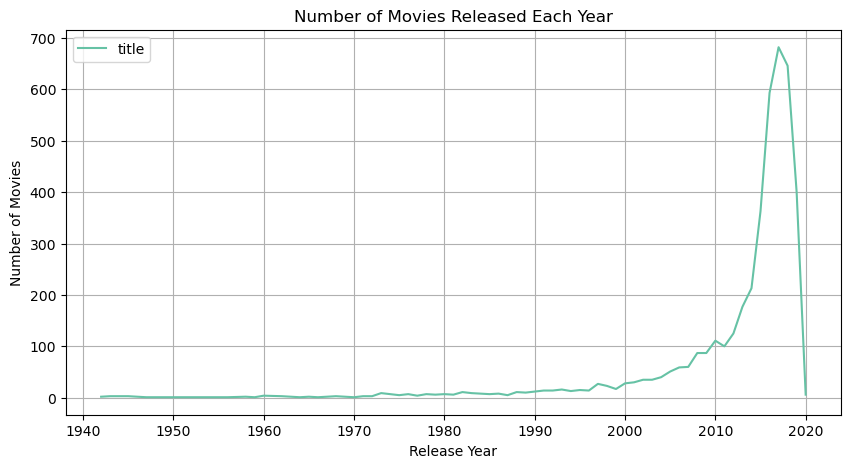

In [112]:
# Plot the pivot table
movie_pivot.plot(kind='line', figsize=(10,5), title='Number of Movies Released Each Year',colormap='Set2')
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

## 📈 Insights from "Number of Movies Released Each Year" Chart

### 1. 📉 Minimal Releases Before 2000
- From **1940 to 2000**, the number of movies released each year remained relatively low.
- Most years saw **fewer than 50 movies**, indicating the limited production capacity and traditional distribution channels of the time.

### 2. 📈 Steady Growth Post-2000
- Starting around **2005**, there's a noticeable rise in the number of movies released.
- This period marks the early influence of **digital technology** and **online streaming platforms**.

### 3. 🚀 Peak Around 2018–2019
- The movie count **peaks around 2018–2019**, with nearly **700 releases in a single year**.
- Possible reasons:
  - Surge in demand for **original content** from streaming services like Netflix.
  - Lower production and distribution costs due to digital transformation.

### 4. ⛔ Sudden Drop in 2020
- A **sharp decline in 2020** is visible — likely due to the **COVID-19 pandemic**.
  - Film shoots halted.
  - Theaters closed.
  - Releases postponed or canceled.

---

### 🎯 Summary
> The chart reflects how the digital revolution reshaped the film industry post-2000, leading to a content explosion that was dramatically halted by the global pandemic in 2020.


In [81]:
# Count shows added each year by type.
df.groupby(['Year_added', 'type']).size()

Year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         4
            TV Show       3
2013        Movie         6
            TV Show       6
2014        Movie        19
            TV Show       6
2015        Movie        58
            TV Show      32
2016        Movie       264
            TV Show     192
2017        Movie       913
            TV Show     387
2018        Movie      1290
            TV Show     492
2019        Movie      1546
            TV Show     803
2020        Movie       147
            TV Show      37
dtype: int64

In [84]:

df.groupby(['Year_added', 'type']).size().unstack(fill_value=0)

type,Movie,TV Show
Year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,4,3
2013,6,6
2014,19,6
2015,58,32
2016,264,192


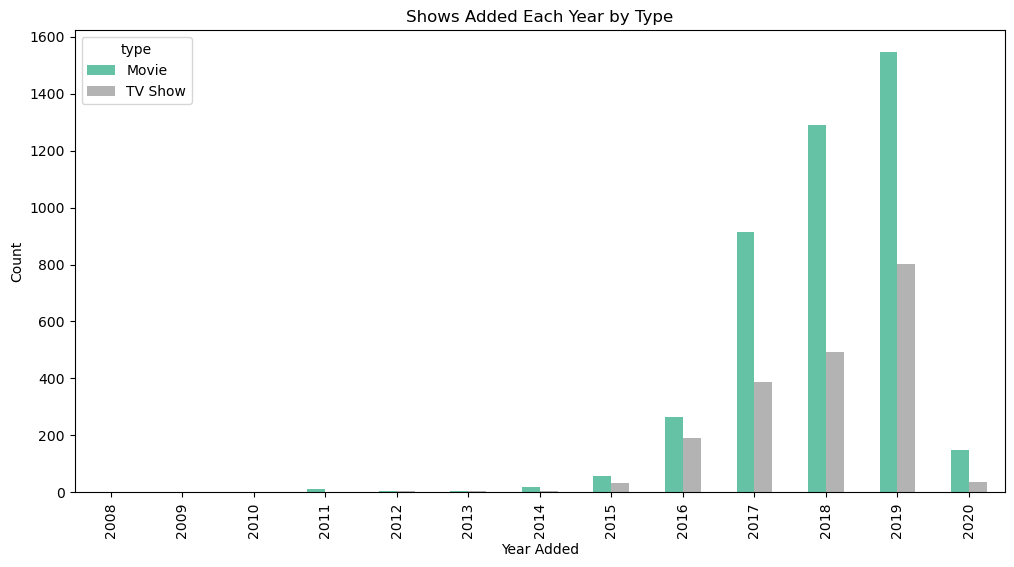

In [111]:
df.groupby(['Year_added', 'type']).size().unstack().plot(kind='bar', figsize=(12, 6), title='Shows Added Each Year by Type',colormap='Set2')
plt.ylabel('Count')
plt.xlabel('Year Added')
plt.show()

### 📊 Insights: Shows Added Each Year by Type

1. **Massive Growth After 2016**  
   - A significant increase in both **Movies** and **TV Shows** added to Netflix began in **2016**.
   - This reflects a strong content expansion phase.

2. **Peak Year – 2019**  
   - The **highest number of shows** were added in **2019**, especially **Movies** (~1550).
   - **TV Shows** also peaked (~800), showing a dual focus on content types.

3. **Movies Consistently Dominate**  
   - Every year, **Movies outnumber TV Shows**, highlighting Netflix's heavier focus on expanding its movie catalog.

4. **Steady Growth (2015–2018)**  
   - Gradual increase in new additions each year suggests sustained investment in content acquisition and production.

5. **Noticeable Drop in 2020**  
   - There is a sharp decline in both content types in **2020**, likely due to the **COVID-19 pandemic** affecting production schedules.

---

###  Business Takeaways

- **Content Strategy Shift**: Post-2016 marks an aggressive content growth period, likely to maintain competitive edge.
- **Audience Retention Focus**: The increase in new titles could be aimed at improving user engagement and subscription retention.
- **Pandemic Disruption**: 2020 highlights the impact of global events on digital content platforms.


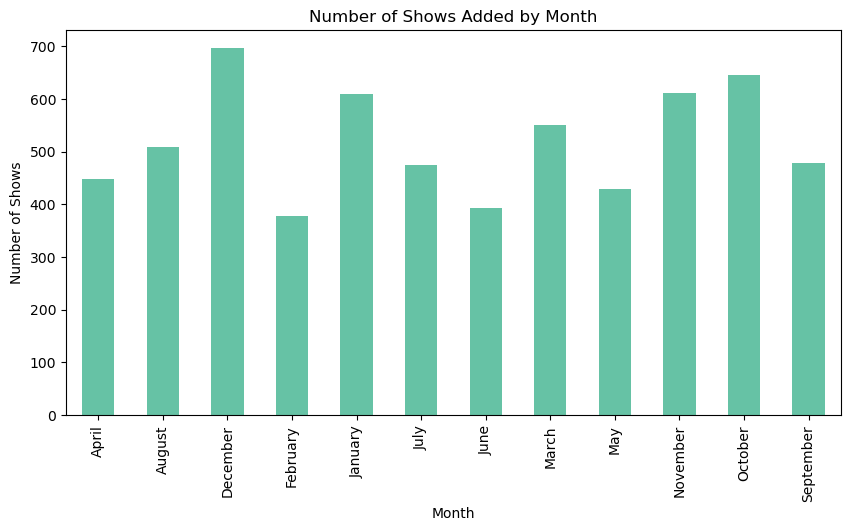

In [110]:
# What month sees the most new releases? Pivot and plot.
df.groupby('Month_added').size().plot(kind='bar', figsize=(10,5), title='Number of Shows Added by Month',colormap='Set2')
plt.xlabel("Month")
plt.ylabel("Number of Shows")
plt.show()


In [107]:

monthly_type_counts=df.groupby(['Month_added','type']).size().unstack()

month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
monthly_type_counts = monthly_type_counts.reindex(month_order)

<Figure size 1200x1000 with 0 Axes>

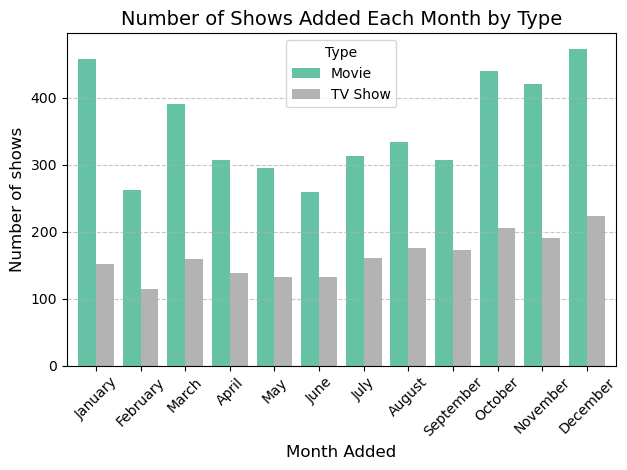

In [109]:
plt.figure(figsize=(12,10))
monthly_type_counts.plot(kind='bar', stacked=False, colormap='Set2', width=0.8)

plt.title('Number of Shows Added Each Month by Type', fontsize=14)
plt.xlabel('Month Added', fontsize=12)
plt.ylabel('Number of shows', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Netflix Content Addition Trends by Month and Type

### 🔹 1. Number of Shows Added by Month

- **December, October, and January** show a significant spike in the number of shows added.
  - These months might be targeted to align with holiday seasons, boosting content availability.
  
- **February and June** observe relatively lower additions compared to other months.

### 🔹 2. Number of Shows Added Each Month by Type

- **Movies** dominate every month compared to **TV Shows**.
  - **December** sees the highest number of movies (~470) and TV Shows (~225) added.
  
- **TV Show additions** remain more consistent, while **movie additions** fluctuate more.
  
- Notable **movie addition spikes** are observed in January, March, October, and December.

- **TV Shows** have comparatively modest variation month-over-month.

### 🔍 Key Insights

- **Strategic Content Drops**: Netflix appears to release more content towards the end and beginning of the year, potentially to capitalize on increased viewership during holidays and New Year.

- **Movie-Heavy Platform**: A clear emphasis on movie additions each month suggests a strategy of refreshing its movie library frequently.

- **Consistent TV Show Release**: The steady TV show addition pattern suggests Netflix maintains a regular schedule, possibly to retain ongoing subscribers with episodic content.


In [ ]:


Show top 10 countries with most content.

Top 5 directors with most content—pivot or value_counts.

Show average release year of TV shows vs Movies.

In [ ]:


📉 Plotting with Pandas

Plot number of releases per year (line plot).

Bar chart: count of Movies vs TV Shows.

Horizontal bar chart: Top 10 genres.

Plot shows added per month (bar).

Box plot: release year distribution by content type.

Heatmap: number of titles by year and month added.

Countplot: top 6 countries by number of shows.

Strip plot: show release year by type.

Histogram of release years.

KDE plot of release years.






